# **Path to Endpoint**

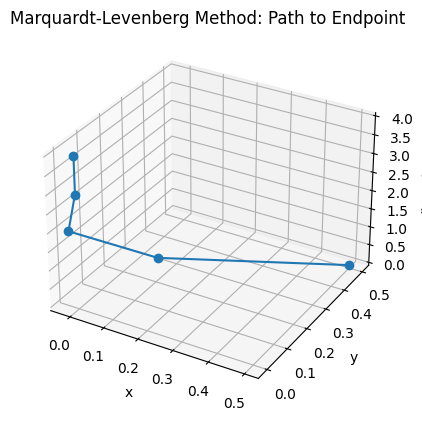

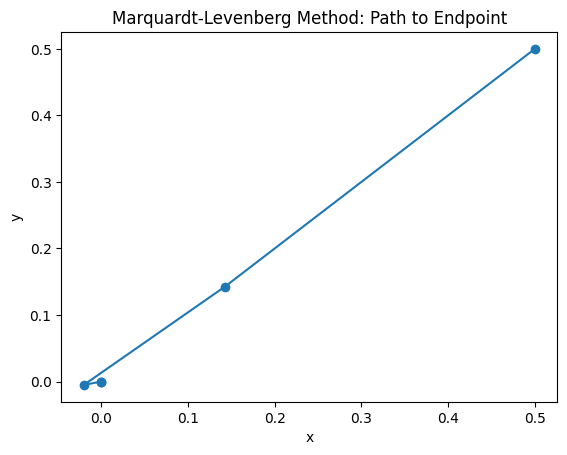

Marquardt-Levenberg Method:
Solution: [-4.72917691e-09  1.13182408e-09]
Iterations: 4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def function(x, y):
    return np.array([
        x**3 - y,
        y**2 - x
    ])

def jacobian(x, y):
    return np.array([
        [3 * x**2, -1],
        [-1, 2 * y]
    ])

def marquardt_levenberg_method(x0, max_iterations=100, tolerance=1e-6, lmbda=0.01):
    x = np.array(x0, dtype=np.float64)
    path = [x]
    iterations = 0

    while np.linalg.norm(function(x[0], x[1])) > tolerance and iterations < max_iterations:
        J = jacobian(x[0], x[1])
        f = function(x[0], x[1])
        H = np.dot(J.T, J) + lmbda * np.eye(2)
        delta_x = np.linalg.solve(H, -np.dot(J.T, f))
        x_new = x + delta_x
        f_new = function(x_new[0], x_new[1])
        if np.linalg.norm(f_new) < np.linalg.norm(f):
            x = x_new
            path.append(x)
            iterations += 1
            lmbda /= 10.0
        else:
            lmbda *= 10.0

    return x, path, iterations

# Set initial guess
x0 = [0.5, 0.5]

# Solve using Marquardt-Levenberg method
solution_marquardt, path_marquardt, iterations_marquardt = marquardt_levenberg_method(x0)

# Plot 3D path
x_path_marquardt = [point[0] for point in path_marquardt]
y_path_marquardt = [point[1] for point in path_marquardt]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_path_marquardt, y_path_marquardt, range(len(x_path_marquardt)), marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Iteration')
plt.title('Marquardt-Levenberg Method: Path to Endpoint')
plt.show()

# Plot 2D path
plt.plot(x_path_marquardt, y_path_marquardt, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Marquardt-Levenberg Method: Path to Endpoint')
plt.show()

print("Marquardt-Levenberg Method:")
print("Solution:", solution_marquardt)
print("Iterations:", iterations_marquardt)


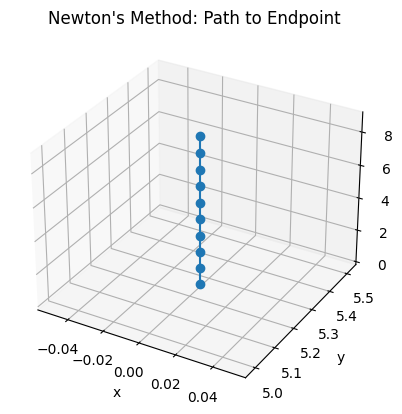

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def function(x, y):
    return np.array([
        x**3 - y,
        y**2 - x
    ])

def jacobian(x, y):
    return np.array([
        [3 * x**2, -1],
        [-1, 2 * y]
    ])

def newton_method(x0, max_iterations=100, tolerance=1e-6):
    x = np.array(x0, dtype=np.float64)
    path = [x]
    iterations = 0

    while np.linalg.norm(function(x[0], x[1])) > tolerance and iterations < max_iterations:
        delta_x = np.linalg.solve(jacobian(x[0], x[1]), -function(x[0], x[1]))
        x += delta_x
        path.append(x)
        iterations += 1

    return x, path, iterations

# Set initial guess
x0 = [0.5, 0.5]

# Solve using Newton's method
solution_newton, path_newton, iterations_newton = newton_method(x0)

# Plot 3D path
x_path_newton = [point[0] for point in path_newton]
y_path_newton = [point[1] for point in path_newton]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_path_newton, y_path_newton, range(len(x_path_newton)), marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Iteration')
plt.title('Newton\'s Method: Path to Endpoint')
plt.show()



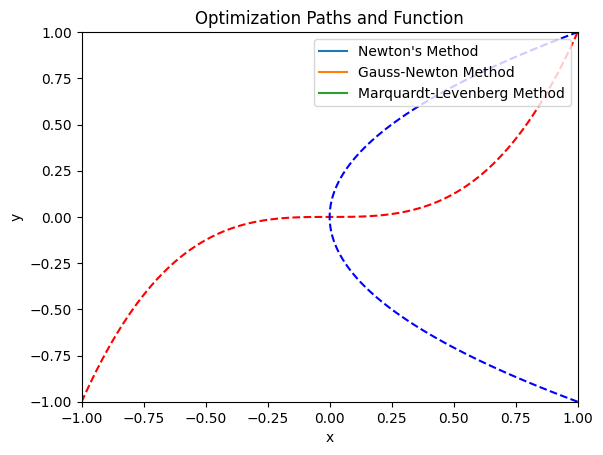

Newton's Method:
Solution: [-9.8187221e-10  0.0000000e+00]
Iterations: 5
Path: [array([-9.8187221e-10,  0.0000000e+00]), array([-9.8187221e-10,  0.0000000e+00]), array([-9.8187221e-10,  0.0000000e+00]), array([-9.8187221e-10,  0.0000000e+00]), array([-9.8187221e-10,  0.0000000e+00]), array([-9.8187221e-10,  0.0000000e+00])]

Gauss-Newton Method:
Solution: [-9.81872210e-10 -1.35525272e-20]
Iterations: 5
Path: [array([-9.81872210e-10, -1.35525272e-20]), array([-9.81872210e-10, -1.35525272e-20]), array([-9.81872210e-10, -1.35525272e-20]), array([-9.81872210e-10, -1.35525272e-20]), array([-9.81872210e-10, -1.35525272e-20]), array([-9.81872210e-10, -1.35525272e-20])]

Marquardt-Levenberg Method:
Solution: [-1.56724727e-08  1.95756621e-09]
Iterations: 6
Path: [array([-1.56724727e-08,  1.95756621e-09]), array([-1.56724727e-08,  1.95756621e-09]), array([-1.56724727e-08,  1.95756621e-09]), array([-1.56724727e-08,  1.95756621e-09]), array([-1.56724727e-08,  1.95756621e-09]), array([-1.56724727e-

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def function(x, y):
    return np.array([
        x**3 - y,
        y**2 - x
    ])

def jacobian(x, y):
    return np.array([
        [3 * x**2, -1],
        [-1, 2 * y]
    ])

def newton_method(x0, max_iterations=100, tolerance=1e-6):
    x = np.array(x0, dtype=np.float64)
    path = [x]
    iterations = 0

    while np.linalg.norm(function(x[0], x[1])) > tolerance and iterations < max_iterations:
        delta_x = np.linalg.solve(jacobian(x[0], x[1]), -function(x[0], x[1]))
        x += delta_x
        path.append(x)
        iterations += 1

    return x, path, iterations

def gauss_newton_method(x0, max_iterations=100, tolerance=1e-6):
    x = np.array(x0, dtype=np.float64)
    path = [x]
    iterations = 0

    while np.linalg.norm(function(x[0], x[1])) > tolerance and iterations < max_iterations:
        J = jacobian(x[0], x[1])
        delta_x = np.linalg.lstsq(J, -function(x[0], x[1]), rcond=None)[0]
        x += delta_x
        path.append(x)
        iterations += 1

    return x, path, iterations

def marquardt_levenberg_method(x0, max_iterations=100, tolerance=1e-6, damping_factor=0.01):
    x = np.array(x0, dtype=np.float64)
    path = [x]
    iterations = 0

    while np.linalg.norm(function(x[0], x[1])) > tolerance and iterations < max_iterations:
        J = jacobian(x[0], x[1])
        residual = function(x[0], x[1])
        delta_x = np.linalg.lstsq(J.T @ J + damping_factor * np.eye(2), -J.T @ residual, rcond=None)[0]
        x += delta_x
        path.append(x)
        iterations += 1

    return x, path, iterations

# Set initial guess
x0 = [0.2, 0.6]

# Define function for plotting
def plot_function():
    x_vals = np.linspace(-1, 1, 100)
    y_vals = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z1 = X**3 - Y
    Z2 = Y**2 - X
    plt.contour(X, Y, Z1, levels=[0], colors='r', linestyles='--')
    plt.contour(X, Y, Z2, levels=[0], colors='b', linestyles='--')

# Solve using Newton's method
solution_newton, path_newton, iterations_newton = newton_method(x0)

# Solve using Gauss-Newton method
solution_gauss_newton, path_gauss_newton, iterations_gauss_newton = gauss_newton_method(x0)

# Solve using Marquardt-Levenberg method
solution_marquardt, path_marquardt, iterations_marquardt = marquardt_levenberg_method(x0)

# Calculate path distances for each method
def calculate_path_distances(path):
    path_distances = [0]
    for i in range(1, len(path)):
        distance = np.linalg.norm(path[i] - path[i-1])
        path_distances.append(path_distances[-1] + distance)
    return path_distances

path_distances_newton = calculate_path_distances(path_newton)
path_distances_gauss_newton = calculate_path_distances(path_gauss_newton)
path_distances_marquardt = calculate_path_distances(path_marquardt)

# Plot the paths and function
plot_function()
plt.plot([x[0] for x in path_newton], [x[1] for x in path_newton], label="Newton's Method")
plt.plot([x[0] for x in path_gauss_newton], [x[1] for x in path_gauss_newton], label="Gauss-Newton Method")
plt.plot([x[0] for x in path_marquardt], [x[1] for x in path_marquardt], label="Marquardt-Levenberg Method")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Optimization Paths and Function')
plt.legend()
plt.show()

# Print results
print("Newton's Method:")
print("Solution:", solution_newton)
print("Iterations:", iterations_newton)
print("Path:", path_newton)
print()

print("Gauss-Newton Method:")
print("Solution:", solution_gauss_newton)
print("Iterations:", iterations_gauss_newton)
print("Path:", path_gauss_newton)
print()

print("Marquardt-Levenberg Method:")
print("Solution:", solution_marquardt)
print("Iterations:", iterations_marquardt)
print("Path:", path_marquardt)


# **Methods Convergence Cmparaison**

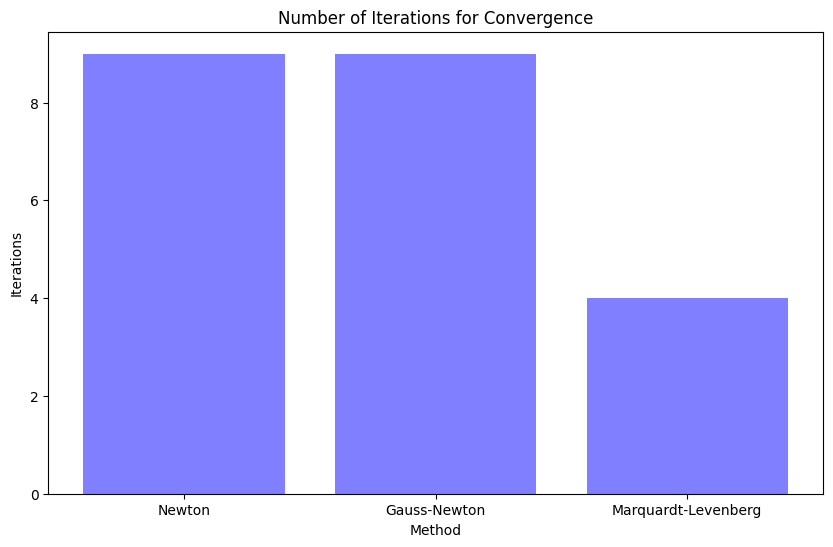

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def function(x, y):
    return np.array([
        x**3 - y,
        y**2 - x
    ])

def jacobian(x, y):
    return np.array([
        [3 * x**2, -1],
        [-1, 2 * y]
    ])

def newton_method(x0, max_iterations=100, tolerance=1e-6):
    x = np.array(x0, dtype=np.float64)
    iterations = 0

    while np.linalg.norm(function(x[0], x[1])) > tolerance and iterations < max_iterations:
        delta_x = np.linalg.solve(jacobian(x[0], x[1]), -function(x[0], x[1]))
        x += delta_x
        iterations += 1

    return x, iterations

def gauss_newton_method(x0, max_iterations=100, tolerance=1e-6):
    x = np.array(x0, dtype=np.float64)
    iterations = 0

    while np.linalg.norm(function(x[0], x[1])) > tolerance and iterations < max_iterations:
        J = jacobian(x[0], x[1])
        f = function(x[0], x[1])
        delta_x = np.linalg.lstsq(J, -f, rcond=None)[0]
        x += delta_x
        iterations += 1

    return x, iterations

def marquardt_levenberg_method(x0, max_iterations=100, tolerance=1e-6):
    x = np.array(x0, dtype=np.float64)
    iterations = 0
    lamda = 0.01

    while np.linalg.norm(function(x[0], x[1])) > tolerance and iterations < max_iterations:
        J = jacobian(x[0], x[1])
        f = function(x[0], x[1])
        H = np.dot(J.T, J) + lamda * np.eye(2)
        delta_x = np.linalg.solve(H, -np.dot(J.T, f))
        new_x = x + delta_x

        if np.linalg.norm(function(new_x[0], new_x[1])) < np.linalg.norm(function(x[0], x[1])):
            lamda /= 10
            x = new_x
            iterations += 1
        else:
            lamda *= 10

    return x, iterations

# Set initial guess
x0 = [0.5, 0.5]

# Solve using Newton's method
solution_newton, iterations_newton = newton_method(x0)

# Solve using Gauss-Newton method
solution_gauss_newton, iterations_gauss_newton = gauss_newton_method(x0)

# Solve using Marquardt-Levenberg method
solution_marquardt, iterations_marquardt = marquardt_levenberg_method(x0)

# Plot comparison graph
methods = ['Newton', 'Gauss-Newton', 'Marquardt-Levenberg']
iterations = [iterations_newton, iterations_gauss_newton, iterations_marquardt]
residual_errors = [residual_error_newton, residual_error_gauss_newton, residual_error_marquardt]

plt.figure(figsize=(10, 6))
plt.bar(methods, iterations, color='blue', alpha=0.5)
plt.xlabel('Method')
plt.ylabel('Iterations')
plt.title('Number of Iterations for Convergence')
plt.show()



# **Marquardt-Levenberg implementation**

In [ ]:
import numpy as np

def function(x, y):
    return np.array([
        x**3 - y,
        y**2 - x
    ])

def jacobian(x, y):
    return np.array([
        [3 * x**2, -1],
        [-1, 2 * y]
    ])

def newton_method(x0, max_iterations=100, tolerance=1e-6):
    x = np.array(x0, dtype=np.float64)
    path = [x]
    residuals = []
    iterations = 0

    while np.linalg.norm(function(x[0], x[1])) > tolerance and iterations < max_iterations:
        delta_x = np.linalg.solve(jacobian(x[0], x[1]), -function(x[0], x[1]))
        x += delta_x
        path.append(x)
        residuals.append(np.linalg.norm(function(x[0], x[1])))
        iterations += 1

    convergence_rate = np.log(residuals[-1] / residuals[-2]) / np.log(residuals[-2] / residuals[-3])

    return x, path, residuals, iterations, convergence_rate

# Set initial guess
x0 = [0.5, 0.5]

# Solve using Newton's method
solution_newton, path_newton, residuals_newton, iterations_newton, convergence_rate_newton = newton_method(x0)

print("Newton's Method:")
print("Solution:", solution_newton)
print("Iterations:", iterations_newton)
print("Convergence Rate:", convergence_rate_newton)


Newton's Method:
Solution: [0.00000000e+00 5.25182187e-18]
Iterations: 9
Convergence Rate: 3.895349905603612


In [ ]:
import numpy as np

def function(x, y):
    return np.array([
        x**3 - y,
        y**2 - x
    ])

def jacobian(x, y):
    return np.array([
        [3 * x**2, -1],
        [-1, 2 * y]
    ])

def newton_gauss_method(x0, max_iterations=100, tolerance=1e-6):
    x = np.array(x0, dtype=np.float64)
    path = [x]
    residuals = []
    iterations = 0

    while np.linalg.norm(function(x[0], x[1])) > tolerance and iterations < max_iterations:
        delta_x = np.linalg.solve(jacobian(x[0], x[1]), -function(x[0], x[1]))
        x += delta_x
        path.append(x)
        residuals.append(np.linalg.norm(function(x[0], x[1])))
        iterations += 1

    convergence_rate = np.log(residuals[-1] / residuals[-2]) / np.log(residuals[-2] / residuals[-3])

    return x, path, residuals, iterations, convergence_rate

# Set initial guess
x0 = [0.5, 0.5]

# Solve using Newton-Gauss method
solution_newton_gauss, path_newton_gauss, residuals_newton_gauss, iterations_newton_gauss, convergence_rate_newton_gauss = newton_gauss_method(x0)

print("Newton-Gauss Method:")
print("Solution:", solution_newton_gauss)
print("Iterations:", iterations_newton_gauss)
print("Convergence Rate:", convergence_rate_newton_gauss)


Newton-Gauss Method:
Solution: [0.00000000e+00 5.25182187e-18]
Iterations: 9
Convergence Rate: 3.895349905603612


In [ ]:
def residuals(x, a, b):
    x_d = 2 * (x[0] - a) - 4 * b * x[0] * (x[1] - x[0]**2)
    y_d = 2 * b * (x[1] - x[0]**2)
    return [x_d, y_d]


# **Residual Surfaces: LM Property**

Solution: [1. 1.]


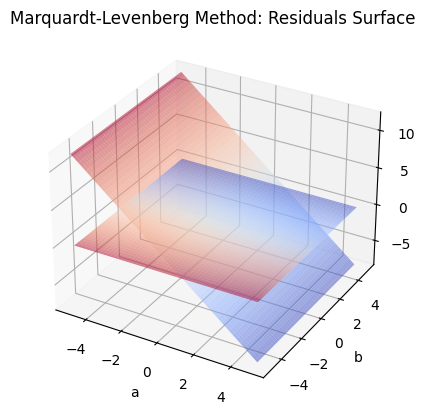

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# Define the residuals function
def residuals(x, a, b):
    x_d = 2 * (x[0] - a) - 4 * b * x[0] * (x[1] - x[0]**2)
    y_d = 2 * b * (x[1] - x[0]**2)
    return [x_d, y_d]

# Set the initial guess
x0 = [0.5, 0.5]
a_val = 1.0
b_val = 2.0

# Solve using Marquardt-Levenberg method
result = least_squares(residuals, x0, args=(a_val, b_val), method='lm')

# Extract the solution
solution = result.x

# Print the solution
print("Solution:", solution)

# Plot the 3D surface
a_range = np.linspace(-5, 5, 100)
b_range = np.linspace(-5, 5, 100)
A, B = np.meshgrid(a_range, b_range)
X_d = 2 * (solution[0] - A) - 4 * B * solution[0] * (solution[1] - solution[0]**2)
Y_d = 2 * B * (solution[1] - solution[0]**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, X_d, alpha=0.5, cmap='coolwarm')
ax.plot_surface(A, B, Y_d, alpha=0.5, cmap='coolwarm')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Residuals')
ax.set_title('Marquardt-Levenberg Method: Residuals Surface')
plt.show()
